In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file into a pandas DataFrame
df_sen = pd.read_csv('sentiment_scores.csv')

In [3]:
# Calculate the percentage of positive, neutral, and negative scores
positive_percent = (df_sen[df_sen['score'] > 0].shape[0] / df_sen.shape[0]) * 100
neutral_percent = (df_sen[df_sen['score'] == 0].shape[0] / df_sen.shape[0]) * 100
negative_percent = (df_sen[df_sen['score'] < 0].shape[0] / df_sen.shape[0]) * 100


In [4]:
# Create a list of labels and values for the pie chart
labels = ['Positive', 'Neutral', 'Negative']
values = [positive_percent, neutral_percent, negative_percent]

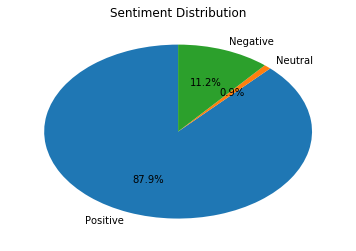

In [5]:
# Set up the pie chart with labels and colors
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title and display the pie chart
ax.set_title('Sentiment Distribution')
plt.show()

In [3]:
df_aapl = pd.read_csv('AAPL.csv')

In [7]:
df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388977,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007015,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099760,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977468,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084980,258529600


In [8]:
df_sen.head()

,date,score
0,01-01-2014,0.052187
1,02-01-2014,0.191948
2,03-01-2014,0.058681
3,04-01-2014,0.139240
4,05-01-2014,0.300750


In [61]:
# Convert date columns to datetime format
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_sen['date'] = pd.to_datetime(df_sen['date'])

In [5]:
# Merge AAPL and sentiment score data on date column
df_aapl = pd.merge(df_aapl, df_sen, left_on='Date', right_on='date', how='left')

In [6]:
df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date,score
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388977,234684800,2014-01-02,0.055892
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007015,392467600,2014-01-03,-0.147735
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099760,412610800,2014-01-06,0.136379
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977468,317209200,2014-01-07,0.244533
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084980,258529600,2014-01-08,0.046479


In [7]:
df_aapl.drop('date', axis=1, inplace=True)

In [8]:
df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,score
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388977,234684800,0.055892
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007015,392467600,-0.147735
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099760,412610800,0.136379
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977468,317209200,0.244533
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084980,258529600,0.046479


In [9]:
df_aapl['StockChange'] = (df_aapl['Close'] - df_aapl['Open']) / df_aapl['Open']

In [10]:
df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,score,StockChange
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388977,234684800,0.055892,-0.004589
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007015,392467600,-0.147735,-0.021488
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099760,412610800,0.136379,0.012057
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977468,317209200,0.244533,-0.007863
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084980,258529600,0.046479,0.008630


In [11]:
df_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume,score,StockChange
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,481.000000,504.000000
mean,26.549448,26.782149,26.292329,26.538082,23.884567,2.300043e+08,0.102851,-0.000225
std,4.434474,4.466456,4.373527,4.415376,4.157761,1.048752e+08,0.101652,0.013159
min,17.684999,17.911785,17.626785,17.849285,15.711792,5.218560e+07,-0.362219,-0.066331
25%,23.499375,23.688751,23.279999,23.480001,20.908066,1.636216e+08,0.046720,-0.007691
50%,27.566250,27.939999,27.200001,27.493751,24.925553,2.060674e+08,0.101700,-0.000055
75%,30.198125,30.368125,29.825000,30.046250,27.303538,2.729564e+08,0.150394,0.008386
max,33.615002,33.634998,32.849998,33.250000,30.023243,1.065523e+09,0.630937,0.086961


In [12]:
# Fill missing sentiment scores with mean score value
mean_score = df_aapl['score'].mean()
df_aapl['score'].fillna(mean_score, inplace=True)

In [13]:
df_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume,score,StockChange
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,504.000000
mean,26.549448,26.782149,26.292329,26.538082,23.884567,2.300043e+08,0.102851,-0.000225
std,4.434474,4.466456,4.373527,4.415376,4.157761,1.048752e+08,0.099301,0.013159
min,17.684999,17.911785,17.626785,17.849285,15.711792,5.218560e+07,-0.362219,-0.066331
25%,23.499375,23.688751,23.279999,23.480001,20.908066,1.636216e+08,0.052278,-0.007691
50%,27.566250,27.939999,27.200001,27.493751,24.925553,2.060674e+08,0.102851,-0.000055
75%,30.198125,30.368125,29.825000,30.046250,27.303538,2.729564e+08,0.147404,0.008386
max,33.615002,33.634998,32.849998,33.250000,30.023243,1.065523e+09,0.630937,0.086961


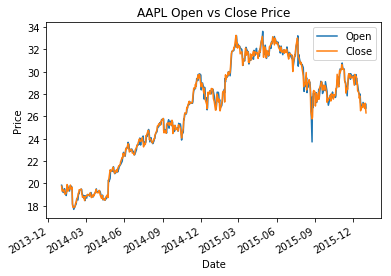

In [14]:
df_aapl.plot(x='Date', y=['Open', 'Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Open vs Close Price')
plt.show()

In [15]:
df_aapl['StockChange'] = df_aapl['StockChange'].apply(lambda x: 1 if x > 0 else -1)

In [16]:
df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,score,StockChange
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388977,234684800,0.055892,-1
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007015,392467600,-0.147735,-1
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099760,412610800,0.136379,1
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977468,317209200,0.244533,-1
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084980,258529600,0.046479,1


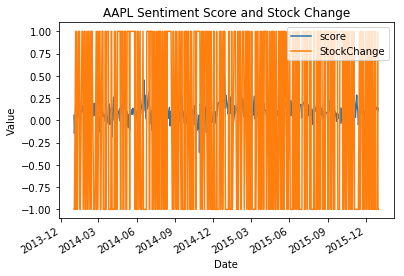

In [17]:
df_aapl.plot(x='Date', y=['score', 'StockChange'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('AAPL Sentiment Score and Stock Change')
plt.show()

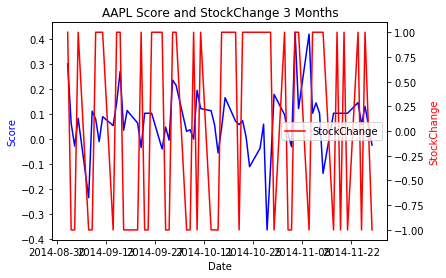

In [18]:
start_date = '2014-09-01'
end_date = '2014-11-30'
mask = (df_aapl['Date'] >= start_date) & (df_aapl['Date'] <= end_date)
aapl_sub = df_aapl.loc[mask]

fig, ax1 = plt.subplots()

ax1.plot(aapl_sub['Date'], aapl_sub['score'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Score', color='blue')

ax2 = ax1.twinx()
ax2.plot(aapl_sub['Date'], aapl_sub['StockChange'], color='red')
ax2.set_ylabel('StockChange', color='red')

# Title and legend
plt.title('AAPL Score and StockChange 3 Months')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X = df_aapl[['score', 'Low', 'High', 'Volume', 'Adj Close']]
y = df_aapl['StockChange']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
f1_knn = f1_score(y_test, y_pred)
auc_knn = roc_auc_score(y_test, y_pred)

print('F1 score: {:.3f}'.format(f1_knn))
print('AUC score: {:.3f}'.format(auc_knn))


F1 score: 0.472
AUC score: 0.499


In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Make predictions on test set
y_pred = svm.predict(X_test)

# Evaluate model performance
f1_svm = f1_score(y_test, y_pred)
auc_svm = roc_auc_score(y_test, y_pred)

print('F1 score: {:.3f}'.format(f1_svm))
print('AUC score: {:.3f}'.format(auc_svm))


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
class_weights = None
if sum(y_train == -1) != 0 and sum(y_train == 1) != 0:
    class_weights = {-1: len(y_train) / (2 * sum(y_train == -1)), 1: len(y_train) / (2 * sum(y_train == 1))}
elif sum(y_train == -1) == 0:
    class_weights = {-1: 1, 1: len(y_train) / (2 * sum(y_train == 1))}
else:
    class_weights = {-1: len(y_train) / (2 * sum(y_train == -1)), 1: 1}

lr = LogisticRegression(class_weight=class_weights)

# Train the model
lr.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = lr.predict(X_test)

# Evaluate the performance using confusion matrix, F-score, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_lr = f1_score(y_test, y_pred)
auc_lr= roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

print('F1-score:', f1_lr)
print('AUC:', auc_lr)

F1-score: 0.6607929515418501
AUC: 0.47238095238095235


In [29]:
from sklearn.naive_bayes import GaussianNB

# Create a GaussianNB object
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

f1_nb = f1_score(y_test, y_pred)
auc_nb = roc_auc_score(y_test, y_pred)

print('F1 score: {:.3f}'.format(f1_nb))
print('AUC score: {:.3f}'.format(auc_nb))


F1 score: 0.601
AUC score: 0.573


In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=63)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

f1_dt = f1_score(y_test, y_pred)

y_prob = dt.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_prob)

print('F1 score: {:.3f}'.format(f1_dt))
print('AUC score: {:.3f}'.format(auc_dt))

F1 score: 0.553
AUC score: 0.585


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=150, random_state=63)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

f1_rf = f1_score(y_test, y_pred_rf)

probs_rf = rf_model.predict_proba(X_test)
auc_rf = roc_auc_score(y_test, probs_rf[:, 1])

print('F1 score: {:.3f}'.format(f1_rf))
print('AUC score: {:.3f}'.format(auc_rf))

C:\Users\Hari\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


F1 score: 0.590
AUC score: 0.611


In [54]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP classifier with 2 hidden layers each containing 64 neurons
clf = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=500)

# Train the model
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1_mlp = f1_score(y_test, y_pred)
auc_mlp = roc_auc_score(y_test, y_pred)

print("F1 score: {:.4f}".format(f1_mlp))
print("AUC score: {:.4f}".format(auc_mlp))

F1 score: 0.6608
AUC score: 0.5000


In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# define the parameter grid to search over
param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,), (50,50), (100,50), (100,100)],
              'activation': ['logistic', 'tanh', 'relu'],
              'alpha': [0.0001, 0.001, 0.01, 0.1],
              'learning_rate': ['constant', 'adaptive']}

# create the MLP classifier
mlp = MLPClassifier(random_state=42)

# create the GridSearchCV object
grid = GridSearchCV(mlp, param_grid, scoring='f1', cv=5, n_jobs=-1)

# fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# print the best hyperparameters and the best score
print("Best hyperparameters: ", grid.best_params_)
print("Best f1 score: ", grid.best_score_)


Best hyperparameters:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
Best f1 score:  0.6615921650096865


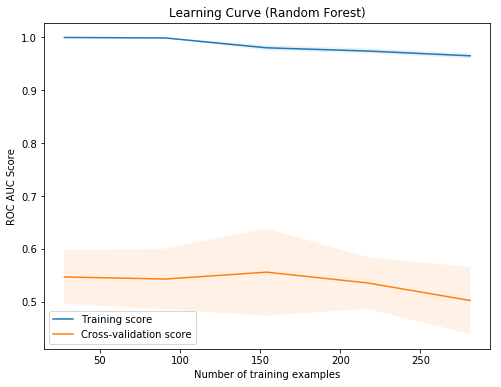

Training F1 score: 0.8857938718662953
Test F1 score: 0.563758389261745
Training AUC score: 0.8838628438589693
Test AUC score: 0.5722077922077922
Training time: 0.17103028297424316
Validation time: 8.052413940429688


In [34]:
import numpy as np
from sklearn.model_selection import learning_curve
import time

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=63)

# Train the model and calculate training time
start_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Make predictions on train and test sets and calculate F1 and AUC scores
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

# Calculate validation time and plot the learning curve
start_time = time.time()
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, 
                                                        scoring='roc_auc', n_jobs=-1)
val_time = time.time() - start_time
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('ROC AUC Score')
plt.title('Learning Curve (Random Forest)')
plt.legend()
plt.show()

# Print the F1 and AUC scores, training and validation time
print('Training F1 score:', train_f1)
print('Test F1 score:', test_f1)
print('Training AUC score:', train_auc)
print('Test AUC score:', test_auc)
print('Training time:', train_time)
print('Validation time:', val_time)


C:\Users\Hari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetri

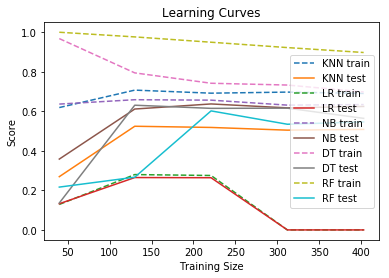

In [62]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# define models
models = {'KNN': knn, 'LR': lr, 'NB': nb, 'DT': dt, 'RF': rf_model}

df_aapl['Date'] = df_aapl['Date'].apply(lambda x: x.timestamp())


# define input features and target variable
X = df_aapl.drop(['StockChange'], axis=1)
y = df_aapl['StockChange']

# define learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, scoring='f1')

# plot learning curves
for model_name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='f1')
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label=f'{model_name} train', linestyle='--')
    plt.plot(train_sizes, test_mean, label=f'{model_name} test')

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


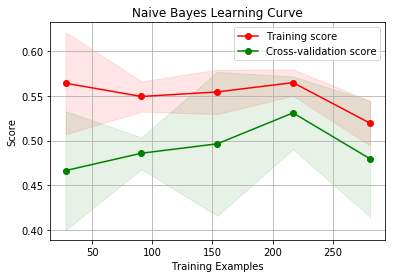

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

nb = GaussianNB()
train_sizes, train_scores, test_scores = learning_curve(nb, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Naive Bayes Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


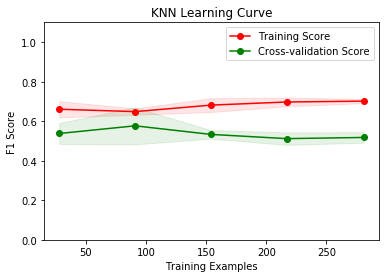

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

# calculate learning curve scores
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5, scoring='f1')

# calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure()
plt.title("KNN Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.legend(loc="best")
plt.show()


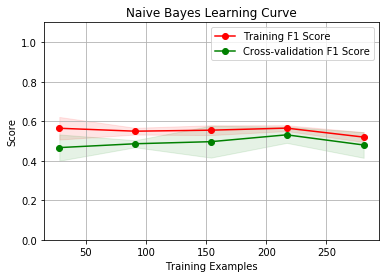

In [50]:
rf_model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=63)
train_sizes, train_scores, test_scores = learning_curve(nb, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Naive Bayes Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation F1 Score")
plt.legend(loc="best")
plt.show()

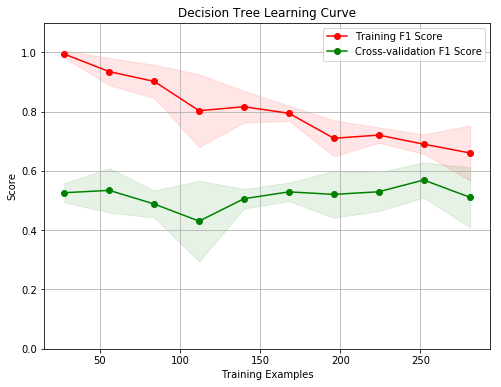

In [49]:
dt = DecisionTreeClassifier(max_depth=5)

# Define the range of training set sizes to plot the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train, cv=5, train_sizes=train_sizes, scoring='f1')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation F1 Score")
plt.legend(loc="best")
plt.show()

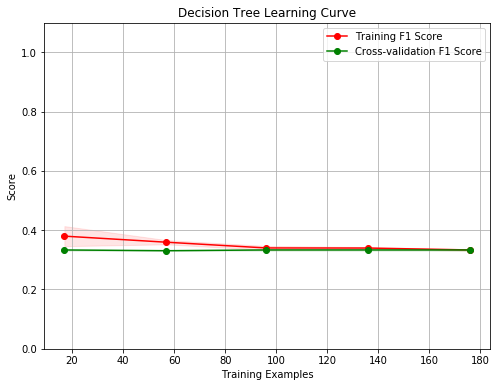

In [69]:
#mlp = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=500)
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=2, scoring='f1_macro', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation F1 Score")
plt.legend(loc="best")
plt.show()

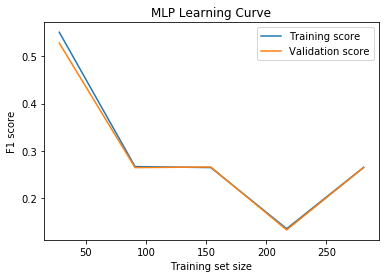

In [52]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('F1 score')
plt.legend(loc='best')
plt.title('MLP Learning Curve')
plt.show()

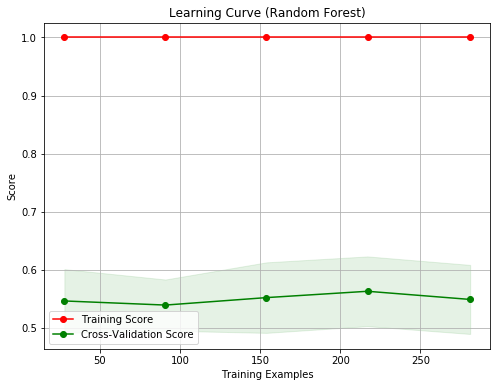

In [43]:
rfc = RandomForestClassifier(n_estimators=100, random_state=63)

# generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(rfc, X_train, y_train, cv=5,scoring='roc_auc', n_jobs=-1)

# calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plot the learning curve
plt.figure(figsize=(8,6))
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
plt.legend(loc='best')
plt.show()